Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno 

Load Data

In [2]:
data=pd.read_csv('housing.csv')
df=data.copy()

In [3]:
#regrassion dataset
#predict houses price
#target---->median_house_value
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()
# no problem in type 
#have missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#missing value
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

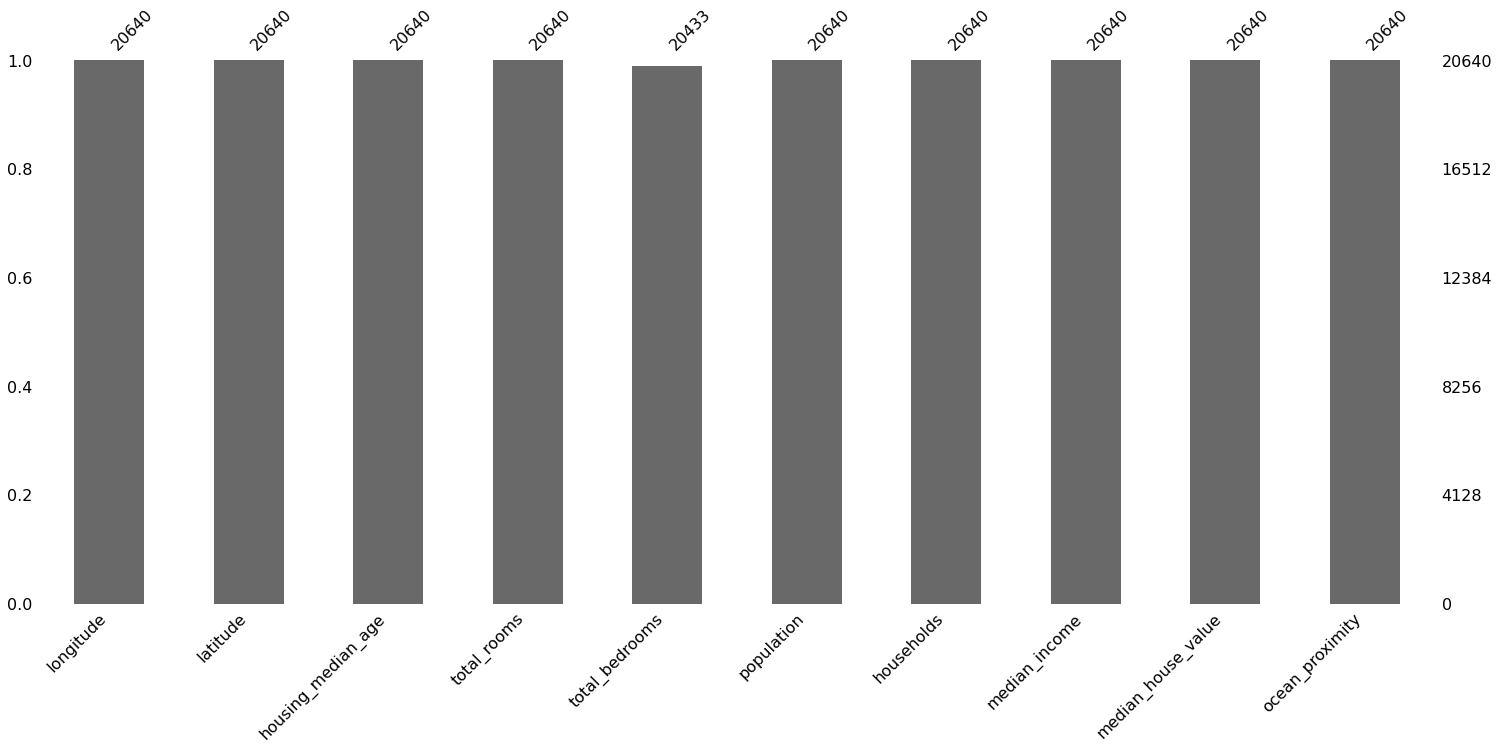

In [7]:
#plot missing value
#mising value in ---total bedrooms
missingno.bar(df)

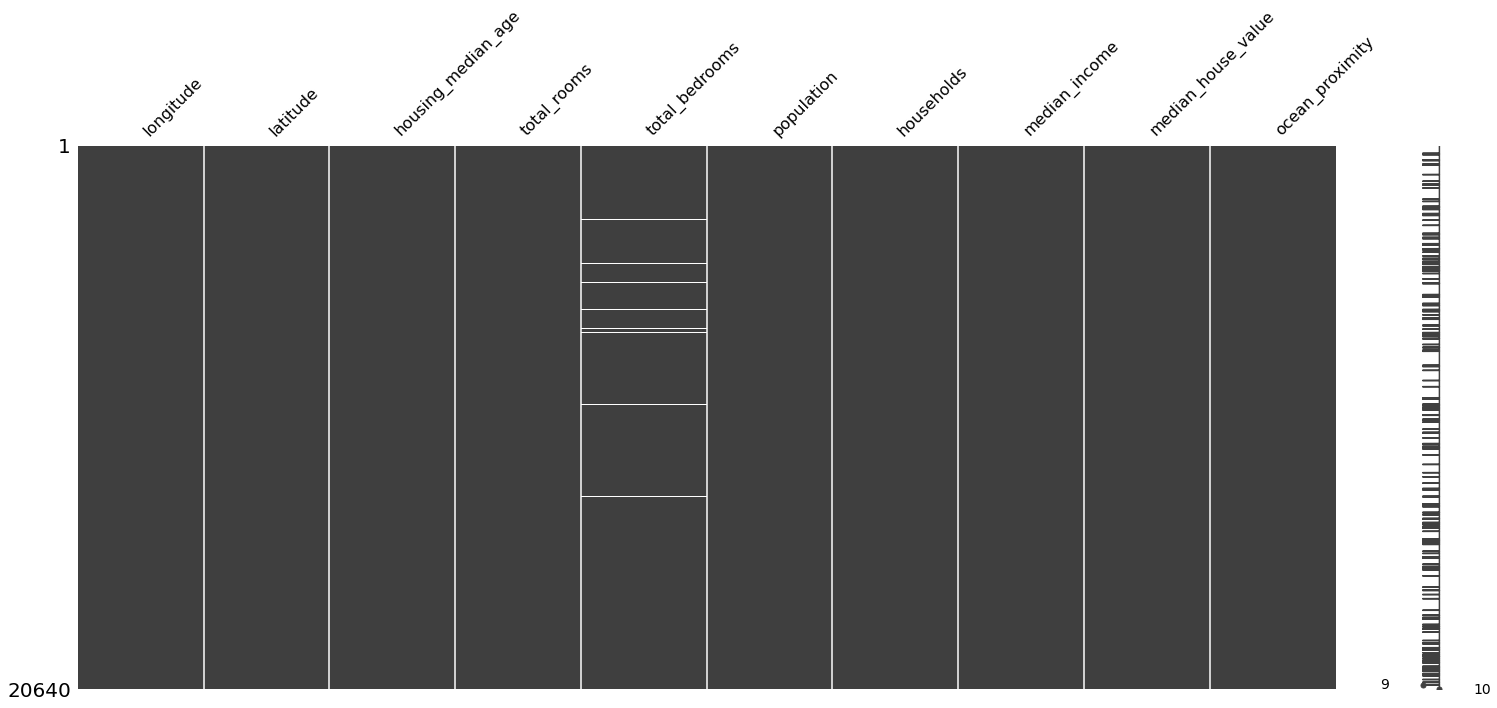

In [8]:
# define postion mising value
missingno.matrix(df)

Exploratory Data Analysis

Visualization

In [9]:
#category ---ocean proximaity
ocean=df['ocean_proximity'].unique()


In [10]:
#order value
#value count order decending
#df['ocean_proximity'].value_counts().index

In [11]:
x=df['ocean_proximity'].value_counts()

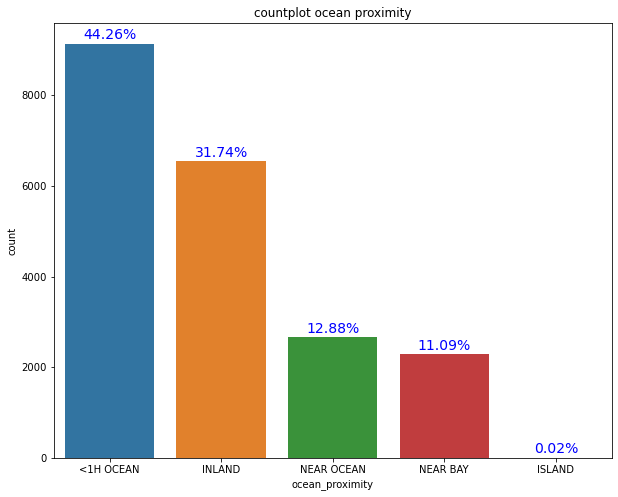

In [12]:
#plot ocean
plt.figure(figsize=(10,8))
plt.title('countplot ocean proximity')
plt.xlabel('ocean proximity')
plt.ylabel('count')
sns.countplot(df['ocean_proximity'],order=df['ocean_proximity'].value_counts().index)

#precision
for i in range(len(ocean)) :
    each_count=x.values[i]
    each_text = f'{((100*each_count)/ len(df)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')

In [13]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
# edit -<1H OCEAN
df['ocean_proximity']=df['ocean_proximity'].replace('<1H OCEAN','1H OCEAN')

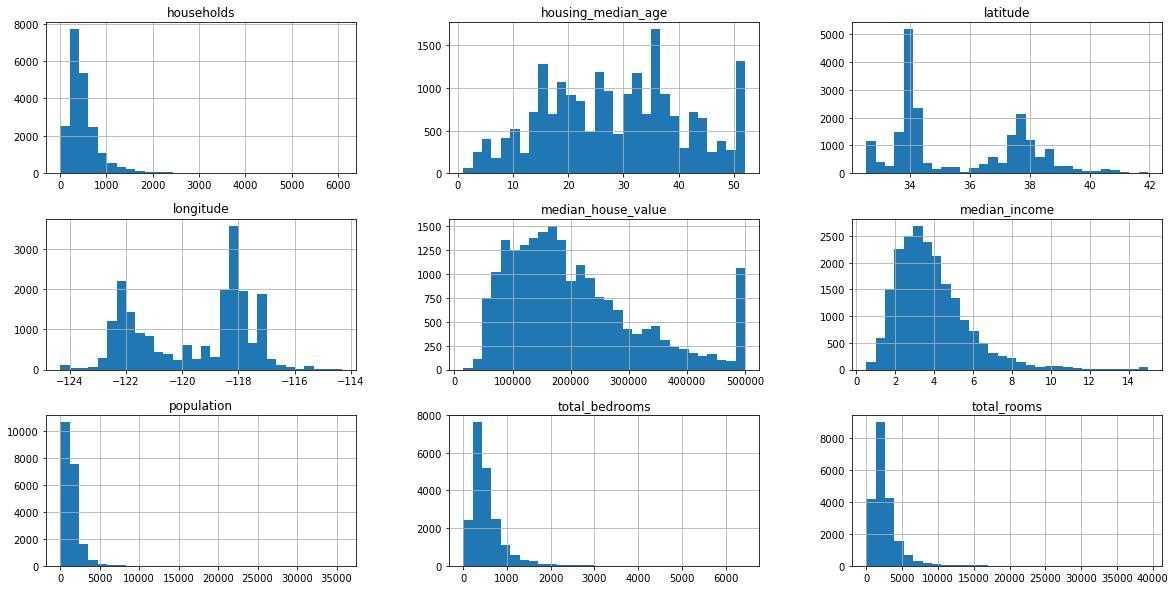

In [15]:
#histogram
#bins--how many data are plot
df.hist(bins=30,figsize=(20,10))
#plt.show----hide text
plt.show()

#hodehold,total rooms,total bedrooms,median income----->right skewed (median<mean),not symmetric


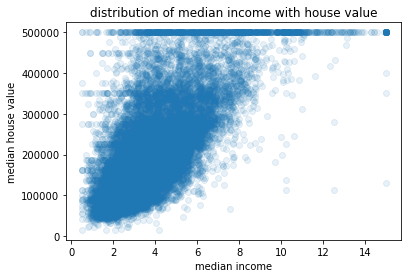

In [16]:
#scatter plot
#high correlation between(median_income,median hous value)
plt.scatter(df['median_income'],df['median_house_value'],alpha=0.1)
plt.title('distribution of median income with house value')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

In [17]:
#make value in mdian house --be unique -by divide in category
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [18]:
# divide in category ----use cut
x=pd.cut(x=df['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
       labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


Text(0, 0.5, 'count')

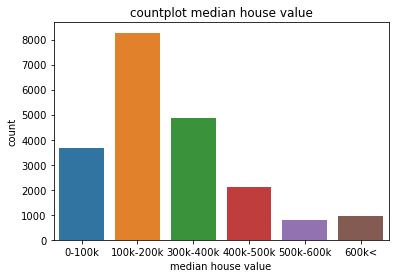

In [19]:
#plot median house
sns.countplot(x)
plt.title('countplot median house value')
plt.xlabel('median house value')
plt.ylabel('count')

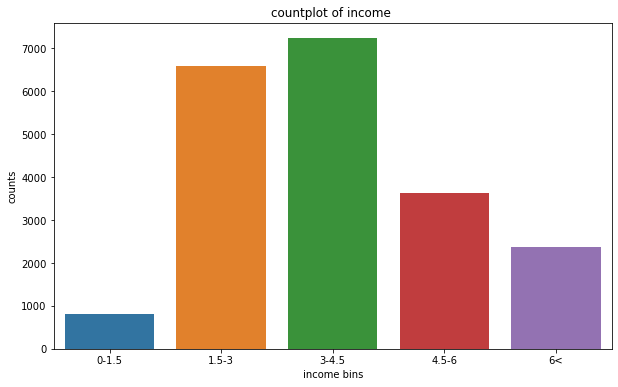

In [20]:
# divide median income in caegory and plot it
income=pd.cut(x=df['median_income'],bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])
plt.figure(figsize=(10,6))
sns.countplot(x=income)
plt.title('countplot of income ')
plt.xlabel('income bins')
plt.ylabel('counts')
plt.show()


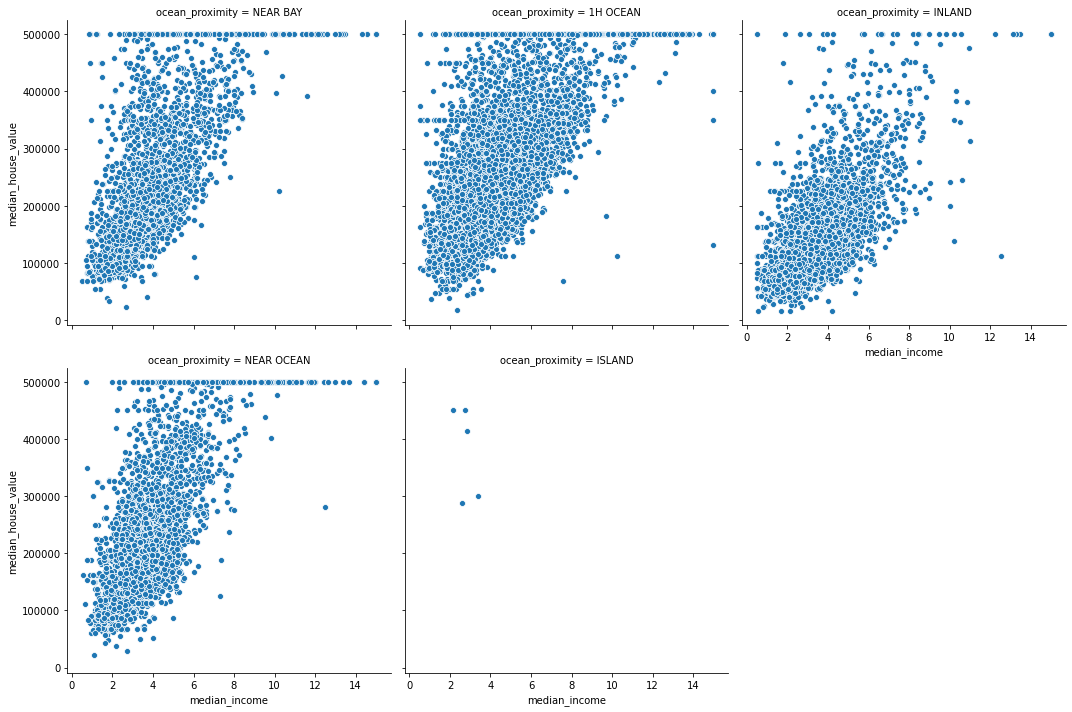

In [21]:
#no diffrent 
sns.relplot(x='median_income',y='median_house_value',data=df,col='ocean_proximity',col_wrap=3)

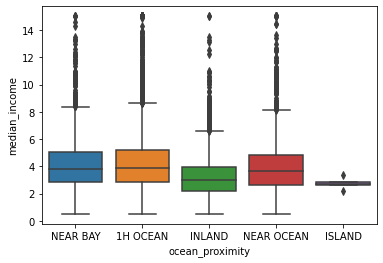

In [22]:
# median income with catgory ocean proximity
sns.boxplot(y='median_income',data=df,x='ocean_proximity')

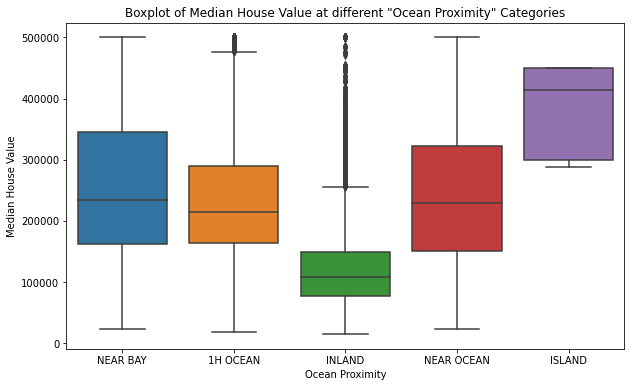

In [23]:
#boxplot median house value at diffrent categories of ocean
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df, x='ocean_proximity')
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()
# distribution of median income is almost same unless inland diffrent

Multivaiate Vizualization

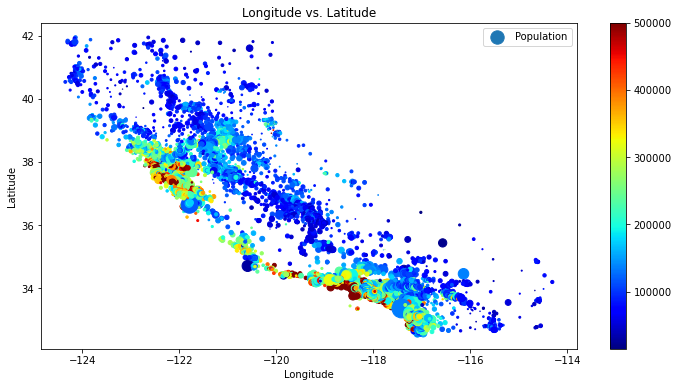

In [24]:
#according to population
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df['longitude'], y=df['latitude'], 
                 s=df['population']/100, c=df['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)   
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs. Latitude')
plt.legend()
plt.show()

Correlation

In [25]:
#high relation between median house value and median income
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

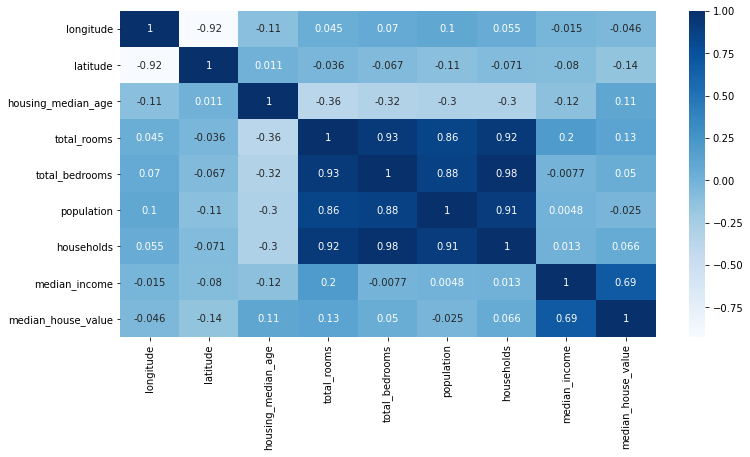

In [26]:
#relatiopship
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()
#population,household--less correlated
#median_income----high correlated

Feature Engineering

In [27]:
# divide to 1- feature selection ,2- feature extraction

In [28]:
#try to add some feature
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedroms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [29]:
#check correlation again
#new feature ---more correlation
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

In [30]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedroms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


Split Data

In [31]:
X = df.drop(columns=['median_house_value'], axis=1)   
y = df['median_house_value'] 

In [32]:
#split random (train+test)
#for validation data---use cross validation
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.15, random_state=42,shuffle=True)

Data preprocessing

In [34]:
#split data into numerical and category
d=[]
for col in X_train.columns:
    if X_train[col].dtypes not in ['int32','int64','float32','float64']:
        d.append(col)

In [35]:
#use list compersion better
num=[col for col in X_train.columns if X_train[col].dtypes  in ['int32','int64','float32','float64']]
cat=[col for col in X_train.columns if X_train[col].dtypes not in ['int32','int64','float32','float64']]

In [36]:
num

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedroms_per_rooms',
 'population_per_household']

In [37]:
cat

['ocean_proximity']

In [38]:
#imputing null value in (total bedrooms ,bedrooms per rooms)
#by median (strategy) or fill_value=1
#imputer must (fit)-- to learn from xtrain
#imputer.transform---apply in train ,test
#imputer.fit_transform---2 at same time
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train[num])


SimpleImputer(strategy='median')

In [39]:
#median for every feature
imputer.statistics_

array([-1.18510000e+02,  3.42650000e+01,  2.90000000e+01,  2.13100000e+03,
        4.37000000e+02,  1.16800000e+03,  4.10500000e+02,  3.54090000e+00,
        5.23456397e+00,  2.02876796e-01,  2.81793691e+00])

In [40]:
# same
X_train[num].median(axis=0)

longitude                   -118.510000
latitude                      34.265000
housing_median_age            29.000000
total_rooms                 2131.000000
total_bedrooms               437.000000
population                  1168.000000
households                   410.500000
median_income                  3.540900
rooms_per_household            5.234564
bedroms_per_rooms              0.202877
population_per_household       2.817937
dtype: float64

In [41]:
#apply --no nulls in train
X_train_filled=imputer.transform(X_train[num])
X_test_filled=imputer.transform(X_train[num])


#equal
#X_train_filled=imputer.fit_transform(X_train[num])
#X_test_filled=imputer.fit_transform(X_train[num])


In [42]:
pd.DataFrame(X_train_filled).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Standarization

In [43]:
#mean=0,std=1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scale=sc.fit_transform(X_train_filled)
X_test_scale=sc.fit_transform(X_test_filled)

In [44]:
sc.mean_

array([-1.19581640e+02,  3.56432091e+01,  2.85830483e+01,  2.63827776e+03,
        5.38051699e+02,  1.42623353e+03,  4.99773313e+02,  3.87451445e+00,
        5.43589847e+00,  2.12891898e-01,  3.08818392e+00])

In [45]:
#pipeline for (impute,scale ) at same time and neline
from sklearn.pipeline import Pipeline
#list have 2 tuple for impute , scale
#first ---impute----after---pipeline
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
#fit it as normal
X_train_num = num_pipeline.fit_transform(X_train[num])  
X_test_num = num_pipeline.transform(X_test[num])  

In [46]:
#label encode (1d)----np.squeeze ---less 1d
np.squeeze(X_train[cat].values)

array(['1H OCEAN', '1H OCEAN', 'INLAND', ..., '1H OCEAN', '1H OCEAN',
       'NEAR BAY'], dtype=object)

In [47]:
#label encodind for (ocean_proximity)
#label encode (1d)----np.squeeze ---less 1d
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb=LabelEncoder()
X_train_encoded = lb.fit_transform(np.squeeze(X_train[cat].values)) 

X_test_encoded = lb.transform(np.squeeze(X_test[cat].values))



In [48]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedroms_per_rooms,population_per_household
4602,-118.27,34.05,12.0,535.0,328.0,1194.0,365.0,1.2012,1H OCEAN,1.465753,0.613084,3.271233
6978,-118.03,33.97,32.0,2468.0,552.0,1190.0,479.0,3.8275,1H OCEAN,5.152401,0.223663,2.484342
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,INLAND,5.000000,0.200000,2.752688
2549,-124.17,40.79,43.0,2285.0,479.0,1169.0,482.0,1.9688,NEAR OCEAN,4.740664,0.209628,2.425311
11025,-117.82,33.79,26.0,2641.0,633.0,3657.0,617.0,4.1339,1H OCEAN,4.280389,0.239682,5.927066
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1H OCEAN,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1H OCEAN,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1H OCEAN,6.395349,0.166993,3.178891


Get all Steps togother

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

#numerical pipeline
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num)),       
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

#categorical pipeline
cat_pipeline=Pipeline(steps=[
    ('selector',DataFrameSelector(cat)),
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('ohe',OneHotEncoder(sparse=False))
])

#concatenate both two pipelines
total_pipeline=FeatureUnion(transformer_list=[
    ('num_pipe',num_pipeline),
    ('cat_pipe',cat_pipeline)
])

#final fit
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)   

Building ML Models

#### Evalution metric :RMSE

In [50]:
from sklearn.metrics import mean_squared_error

### 1-linearRegrassion

RMSE------67.8

In [51]:
from sklearn.linear_model import LinearRegression


In [52]:
lr=LinearRegression()
lr.fit(X_train_final,y_train)

LinearRegression()

In [53]:
#widghts theta
lr.coef_

array([-56184.04000997, -56481.67278334,  13865.47497456,   6121.36866331,
         8917.83877966, -46640.74395353,  36635.13814887,  79167.50957127,
         6353.87452105,  16581.11317897,    703.20742147, -22049.31963557,
       -56524.85301347, 124491.42764171, -27569.68606494, -18347.56892772])

In [54]:
lr.intercept_

239967.57074164553

In [55]:
#use crossvalidation (k-folds) iterations
#to best predict rather than predict in train
#cross_val_scre--evalution
#-1---alll
#rms ----neg for bad
from sklearn.model_selection import cross_val_score,cross_val_predict
mse_score_lin=cross_val_score(estimator=lr,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse_score_lin=mse_score_lin*-1
rmse=np.sqrt(mse_score_lin)
#validation (learn 1 and test in 4 )
rmse.mean()

67880.14257788868

In [56]:
#preication 
ypred2=cross_val_predict(estimator=lr,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')

In [57]:
np.sqrt(mean_squared_error(y_train,ypred2))

67898.88872785706

2-SGDRegressor

RMSE----68.7

In [58]:
#Stochastic Gradient Descent
#minimize cost function

In [59]:
from sklearn.linear_model import SGDRegressor

In [60]:
sgd=SGDRegressor(penalty='l2',alpha=0.0001,eta0=0.001,shuffle=True,max_iter=1000)

In [61]:
#train
sgd.fit(X_train_final,y_train)

SGDRegressor(eta0=0.001)

In [62]:
#evalutin
mse_sgd=cross_val_score(estimator=sgd,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse_sgd=mse_sgd*-1
rmse=np.sqrt(mse_sgd)
rmse.mean()

67992.30808425193

In [63]:
#predict
#preication 
ypred_sgd=cross_val_predict(estimator=sgd,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
np.sqrt(mean_squared_error(y_train,ypred_sgd))

68013.35161776282

3-Ridge (l2)

RMSE----67.9

In [64]:
#avoid overfiting and underfitng by increase alpha

In [65]:
from sklearn.linear_model import Ridge

In [66]:
#1
ridge=Ridge(alpha=0.9,solver='cholesky')

In [67]:
#2-fit
ridge.fit(X_train_final,y_train)

Ridge(alpha=0.9, solver='cholesky')

In [68]:
#3-cv
rmse_r=cross_val_score(estimator=ridge,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse_r=rmse_r*-1
rmse_r=np.sqrt(rmse_r)
rmse_r.mean()

67880.21922984191

In [69]:
#4-predict
ypred_r=cross_val_predict(estimator=ridge,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred_r

array([184251.80264792, 230123.12466144, 145102.35346503, ...,
       195115.87719925, 278855.5714773 , 272456.8636632 ])

In [70]:
#5-score
np.sqrt(mean_squared_error(y_train,ypred_r))

67898.9471047631

4-Lasso (l1)

In [71]:
#RMSE--67.9

In [72]:
#- least absolute shrinkage and selection operator
#- remove features
#- feature importance and selection

In [73]:
from sklearn.linear_model import Lasso


In [74]:
lasso=Lasso(alpha=1,max_iter=100000)

In [75]:
rmse_l=cross_val_score(estimator=lasso,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse_l=rmse_l*-1
rmse_l=np.sqrt(rmse_l)
rmse_l.mean()

67879.9723018768

In [76]:
ypred_l=cross_val_predict(estimator=lasso,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred_l

array([184281.59497192, 230103.29163655, 145095.42192425, ...,
       195098.10117516, 278867.15965312, 272476.06687003])

In [77]:
np.sqrt(mean_squared_error(y_train,ypred_r))

67898.9471047631

5-Elasticnet (l1+l2)

RMSE---68.3

In [78]:
from sklearn.linear_model import ElasticNet
x= ElasticNet(alpha=0.1, l1_ratio=0.5)
x.fit(X_train_final, y_train) 

ElasticNet(alpha=0.1)

In [79]:
rmse=cross_val_score(estimator=x,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

68581.26101196748

In [80]:
ypred=cross_val_predict(estimator=x,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([168985.68193673, 230781.99823586, 145974.34133971, ...,
       197385.82982289, 276281.08115685, 255986.16346641])

In [81]:
np.sqrt(mean_squared_error(y_train,ypred))

68590.35200309507

6- PolynoimalRegression 

RMSE-----67.8

In [82]:
# try to estimate relationship (non-linear)
#add new feature 

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
poly=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=poly.fit_transform(X_train_final)

In [85]:
#pass the new poly feature to model
lr_poly=LinearRegression()

In [86]:
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [87]:
rmse=cross_val_score(estimator=lr_poly,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

67880.14257788868

In [88]:
ypred=cross_val_predict(estimator=lr_poly,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([184295.23244419, 230100.88200316, 145096.2664977 , ...,
       195094.05173242, 278871.44475451, 272476.85764427])

In [89]:
np.sqrt(mean_squared_error(y_train,ypred))

67898.88872785706

7-KNN

RMSE---60.2

In [90]:
#low n--->overfiting ,high n-->overfiting

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knn=KNeighborsRegressor(n_neighbors=8,p=2,metric='minkowski',weights='uniform')

In [93]:
knn.fit(X_train_final,y_train)

KNeighborsRegressor(n_neighbors=8)

In [94]:
rmse=cross_val_score(estimator=knn,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

60915.69528356775

In [95]:
ypred=cross_val_predict(estimator=knn,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([245062.625, 279312.625, 131612.5  , ..., 191175.   , 262150.   ,
       364937.625])

In [96]:
np.sqrt(mean_squared_error(y_train,ypred))

60923.51232816567

7-RandomForest

RMSE---60.5

In [97]:
#bootstraping--parallel

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf=RandomForestRegressor(n_estimators=150,max_depth=6,max_samples=0.8, random_state=42, n_jobs=-1)
rf.fit(X_train_final,y_train)

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [100]:
rmse=cross_val_score(estimator=rf,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

59969.67796450624

In [101]:
ypred=cross_val_predict(estimator=rf,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([172213.13281203, 225598.3536122 , 113689.39813131, ...,
       171850.70142051, 256078.07759593, 260822.55363346])

In [102]:
np.sqrt(mean_squared_error(y_train,ypred))

59980.31941432441

RF tuning

RMSE---50.9

In [103]:
#using gridsearchcv ---to find best paramter
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

In [104]:
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=rf, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2391187635.752, total=   4.8s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2781205995.392, total=   4.7s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2645155556.888, total=   4.6s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2418477575.713, total=   4.2s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.2s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2556063413.546, total=   4.2s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.4s remaining:    0.0s


[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2492709737.035, total=   6.1s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2884779798.841, total=   6.7s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2755109200.857, total=   5.9s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2509031588.719, total=   6.0s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2675278522.861, total=   6.1s
[CV] n_estimators=450, max_samples=0.9, max_depth=4 ..................
[CV]  n_estimators=450, max_samples=0.9, max_depth=4, score=-4363008374.205, total=   4.5s
[CV] n_estimators=450, max_samples=0.9, max_depth=4 ..................
[CV]  n_estimators=450,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [105]:
print("Best: %f using %s" % (search_random_forest.best_score_, search_random_forest.best_params_))

Best: -2525361507.067209 using {'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}


In [106]:
#best estimator
best_forest = search_random_forest.best_estimator_
best_forest

RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      n_jobs=-1, random_state=42)

In [107]:
rmse=cross_val_score(estimator=best_forest,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

50233.050012339765

In [108]:
ypred=cross_val_predict(estimator=best_forest,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([204483.04740714, 210335.03598082, 126118.9784254 , ...,
       196104.10234555, 260581.44707892, 313099.36810487])

In [109]:
np.sqrt(mean_squared_error(y_train,ypred))

50252.97516454289

Feature importance using RF

In [110]:
#DataFrame
z=pd.DataFrame({'Features': num,'score':best_forest.feature_importances_[:11]})
z= z.sort_values(by='score', ascending=False)

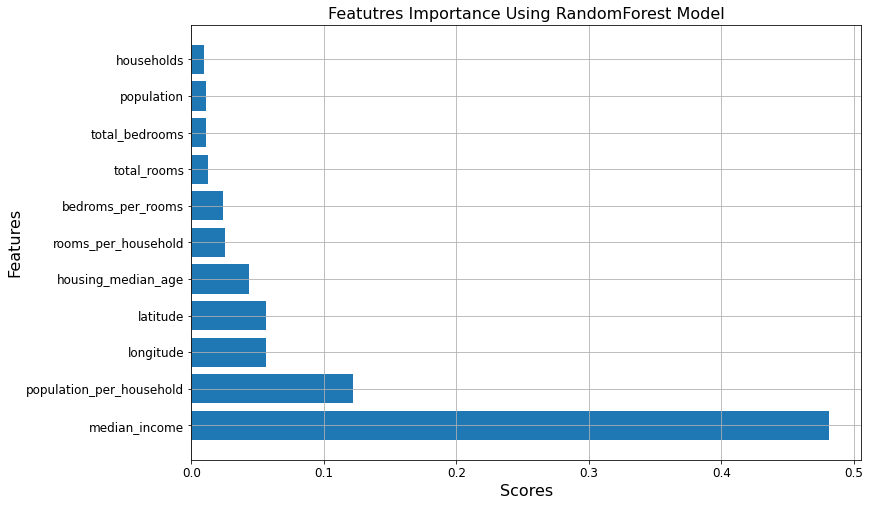

In [111]:
#plot z
plt.figure(figsize=(12, 8))
plt.barh(y=z['Features'], width=z['score'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

8-XGboost

RMSE---59.3

In [113]:
from xgboost import XGBRegressor

In [114]:
xg=XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8)
xg.fit(X_train_final,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [115]:
rmse=cross_val_score(estimator=xg,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

47628.51583225171

In [116]:
ypred=cross_val_predict(estimator=xg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([191146.11 , 214788.83 , 125007.945, ..., 220911.75 , 263847.1  ,
       333939.47 ], dtype=float32)

In [117]:
np.sqrt(mean_squared_error(y_train,ypred))

47638.2573921342

Tuning Xgboost

RMSE----45.2

In [118]:
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}



grid_xgb = GridSearchCV(estimator=xg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.7min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_bin=256,
                                    max_cat_to_oneh...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
            

In [119]:
print("Best: %f using %s" % (grid_xgb.best_score_, grid_xgb.best_params_))

Best: -2104820642.258049 using {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}


In [120]:
#best estimator
bestxg = grid_xgb.best_estimator_
bestxg

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [121]:
rmse=cross_val_score(estimator=bestxg,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

45867.83559946849

In [122]:
ypred=cross_val_predict(estimator=bestxg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([173304.75, 207752.08, 136062.45, ..., 204140.45, 276659.8 ,
       353365.4 ], dtype=float32)

In [123]:
np.sqrt(mean_squared_error(y_train,ypred))

45878.297538461746

Feature Importance using XGBoost

*Feature Importance for tuned model of xgboost

*Importance_types
-‘weight’ - the number of times a feature is used to split the data across all trees. --> I used this Method

-‘gain’ - the average gain across all splits the feature is used in.

-‘cover’ - the average coverage across all splits the feature is used in.

-‘total_gain’ - the total gain across all splits the feature is used in.

-‘total_cover’ - the total coverage across all splits the feature is used in.

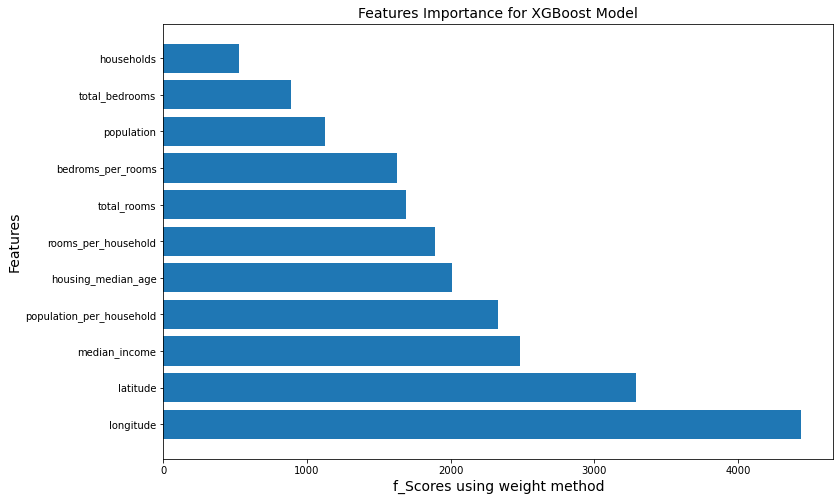

In [126]:
feat_import_xgb = bestxg.get_booster().get_score(importance_type='weight')  
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')   
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns={'index': 'Features', 0:'f_scores'})  

## Only taking the first 11 Numerical Cols 
df_feat_import_xgb = df_feat_import_xgb[:11]   ## take only the first 11 Numerical Cols

# ## Some Sort to plot
df_feat_import_xgb['Features'] = num
df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)


## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_xgb['Features'], width=df_feat_import_xgb['f_scores'])
plt.title('Features Importance for XGBoost Model', fontsize=14, c='k')
plt.xlabel('f_Scores using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()


VotingRegressor

RMSE----47.8

In [127]:
from sklearn.ensemble import VotingRegressor

In [128]:
#average for rf+xgbost
voting_reg = VotingRegressor(estimators=[
                                        ('tuned_forest', best_forest), 
                                        ('tuned_xgb', bestxg)
                                        ]
                            )

voting_reg.fit(X_train_final, y_train)

VotingRegressor(estimators=[('tuned_forest',
                             RandomForestRegressor(max_depth=18,
                                                   max_samples=0.9,
                                                   n_estimators=400, n_jobs=-1,
                                                   random_state=42)),
                            ('tuned_xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
  

In [129]:
rmse=cross_val_score(estimator=voting_reg,X=X_train_final,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rmse=rmse*-1
rmse=np.sqrt(rmse)
rmse.mean()

47112.95145612788

In [130]:
ypred=cross_val_predict(estimator=voting_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
ypred

array([188893.89870357, 209043.55705291, 131090.7157752 , ...,
       200122.27773527, 268620.62978946, 333232.38717743])

In [131]:
np.sqrt(mean_squared_error(y_train,ypred))

47127.87599247422

Download model

In [132]:
import joblib

In [133]:
#download
joblib.dump(bestxg, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [134]:
#load
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Interface on Test Dataset

In [136]:
y_pred_test = loaded_model.predict(X_test_final)  


rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [137]:
rmse_test

44546.85602114991